<a href="https://colab.research.google.com/github/KateMals/AB_testing/blob/main/itog_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from scipy.stats import ttest_1samp
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
from google.colab import files
uploaded = files.upload()

Saving ab_stats (1).csv to ab_stats (1).csv


In [3]:
data = pd.read_csv('ab_stats (1).csv')

data.head(10)

,revenue,num_purchases,purchase,ab_group,av_site visit
0,0.0,0,0,A,9.040174
1,0.0,0,0,A,4.811628
2,0.0,0,0,A,7.342623
3,0.0,0,0,A,7.744581
4,0.0,0,0,A,10.511814
5,0.0,0,0,A,9.578727
6,0.0,0,0,A,6.162601
7,0.0,0,0,A,11.909452
8,0.0,0,0,A,6.540910
9,0.0,0,0,A,7.990794


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23652 entries, 0 to 23651
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   revenue        23652 non-null  float64
 1   num_purchases  23652 non-null  int64  
 2   purchase       23652 non-null  int64  
 3   ab_group       23652 non-null  object 
 4   av_site visit  23652 non-null  float64
dtypes: float64(2), int64(2), object(1)
memory usage: 924.0+ KB


In [6]:
data.ab_group.value_counts()

A    11835
B    11817
Name: ab_group, dtype: int64

In [7]:
11835 - 11817

18

Cплитование по версиям произведено корректно и почти поровну(в группе А и в группе В) Разница кол-ва в каждой выборке 11835 - 11817 = 18, это не более 5%, поэтому проблем с этим при интерпретации результатов не будет

In [28]:
data = data[data['av_site visit'] >= 0]

In [29]:
group_A = data[data['ab_group'] == 'A']
group_B = data[data['ab_group'] == 'B']

In [30]:
group_A.describe()

,revenue,num_purchases,purchase,av_site visit
count,11829.000000,11829.000000,11829.000000,11829.000000
mean,0.404667,0.050723,0.021642,6.980379
std,13.136545,1.467883,0.145517,2.004450
min,0.000000,0.000000,0.000000,0.145466
25%,0.000000,0.000000,0.000000,5.657590
50%,0.000000,0.000000,0.000000,6.984166
75%,0.000000,0.000000,0.000000,8.346243
max,1303.609284,152.000000,1.000000,17.728836


In [31]:
data[data['av_site visit'] < 0].ab_group.value_counts()

Series([], Name: ab_group, dtype: int64)

In [32]:
group_B.describe()

,revenue,num_purchases,purchase,av_site visit
count,11355.000000,11355.000000,11355.000000,11355.000000
mean,0.245093,0.036548,0.019727,7.404806
std,3.192299,0.422820,0.139067,3.630412
min,0.000000,0.000000,0.000000,0.008679
25%,0.000000,0.000000,0.000000,4.746728
50%,0.000000,0.000000,0.000000,7.262590
75%,0.000000,0.000000,0.000000,9.889165
max,113.830000,25.000000,1.000000,22.446822


Максимальный чек в группе А сильно больше, чем в группе B.

## **Проверка на нормальность распределения и применение статистических критериев**

In [15]:
from statsmodels.stats import proportion
from scipy.stats import shapiro
from scipy.stats import ttest_ind
from scipy.stats import mannwhitneyu
from scipy.stats import kstest

# Метрика визиты на юзера

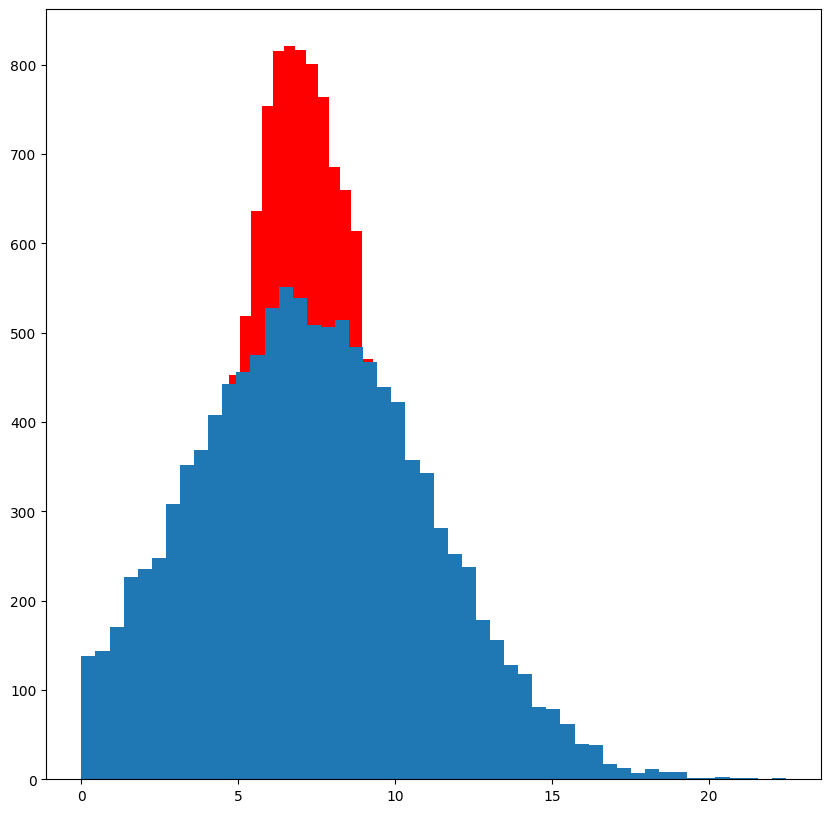

In [51]:
plt.figure(figsize=(10, 10))
control_visit_all = data['av_site visit'][data['ab_group'] == 'A']
test_visit_all =data['av_site visit'][data['ab_group'] == 'B']


plt.hist(control_visit_all, color='r', bins=50)
plt.hist(test_visit_all,  bins=50)


plt.show()

In [50]:
shapiro(group_A['av_site visit'])

/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.9995651245117188, pvalue=0.0068447222001850605)

Распределение ненормальное, т к p-value получился очень маленький

In [33]:
n1 = group_A.purchase.value_counts().sum()
n2 = group_B.purchase.value_counts().sum()
k1 = group_A.purchase.value_counts()[1]
k2 = group_B.purchase.value_counts()[1]

n1,n2,k1,k2

(11829, 11355, 256, 224)

In [34]:
chisq, pvalue, table = proportion.proportions_chisquare(np.array([k1, k2]),
np.array([n1, n2]))

print('Results are ','chisq =%.3f, pvalue = %.3f'%(chisq, pvalue))

Results are  chisq =1.048, pvalue = 0.306


In [36]:
stats, pvalue = proportion.proportions_ztest(np.array([k1, k2]),
np.array([n1, n2]))

print('Results are ','z =%.3f, pvalue = %.3f'%(stats, pvalue))

Results are  z =1.024, pvalue = 0.306


Результаты Хи-теста и z-теста показывают pvalue = 0.306, что означает, что нет статистически значимых различий между двумя группами А и В группами в отношении конверсий.

In [47]:
ttest_ind(group_A['av_site visit'], group_B['av_site visit'], equal_var = False)

TtestResult(statistic=-10.957295422202266, pvalue=7.548128551839558e-28, df=17530.29639618072)

Статистически значимые различия есть, тк значение p-value получилось очень маленькое.

In [48]:
mannwhitneyu(group_A['av_site visit'], group_B['av_site visit'])

MannwhitneyuResult(statistic=63190248.0, pvalue=6.651555853367293e-15)

При проведении теста Манна-Уитни p-value также очень маленькое - выборки имеют статистически значимые различия

---



---



In [49]:
group_A['av_site visit'].mean(), group_B['av_site visit'].mean()

(6.980379496709522, 7.404806266947357)

Пользователи с группы B проводят больше времени на сайте, нам же более интересно, чтобы пользователи проводили меньше времени на сайте и приносили больше прибыли

ARPPU - средняя выручка на платящих пользователей

# Метрика доля юзеров с покупкой (ARPPU)

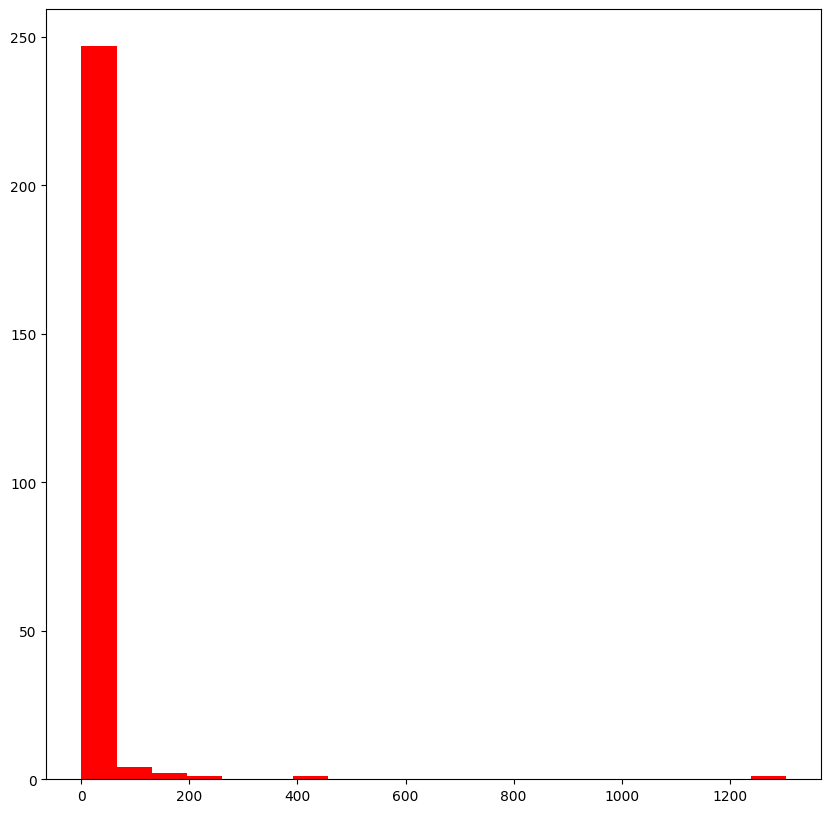

In [60]:
plt.figure(figsize=(10, 10))
control_visit = data['revenue'][(data['ab_group'] == 'A')&(data['purchase'] == 1)]
test_visit =data['revenue'][(data['ab_group'] == 'B')&(data['purchase'] == 1)]
plt.hist(test_visit,  bins=20)
plt.hist(control_visit, color='r', bins=20)

plt.show()

In [61]:
mw_stats = mannwhitneyu(x=data[(data['ab_group'] == 'A')&(data['purchase'] == 1)]['revenue'].values,
                                                  y=data[(data['ab_group'] == 'B')&(data['purchase'] == 1)]['revenue'].values)
mw_stats

MannwhitneyuResult(statistic=28485.5, pvalue=0.902319344132039)

Статистически значимый различий в ARPPU в двух группах не наблюдается

Выводы: применять изменения проверяемые при А/В тесте нецелесообразно, т.к. результаты теста не различаются и основания отвергнуть нулевую гипотезу нет.